# EMP simulation code

 Parameters for the propulsion :

1.   Input Parameters:
*   Mass of the Projectile
*   Gravitational acceleration
*   Capacitance in the bank
*   Input Voltage
*   Permiability of free space
*   Relative permiability
*   Resistivity of the material
*   Coefficient of friction
*  Width of the rail
*  Thickness of the rail

2. Output Parameters:
*  Area of the rail
*  Resistance gradient
*  Inductance gradient
*  Force due to electric current
*  Force due to friction
*  Total Force
*  Acceleration
*  Velocity
*  Disctance travelled
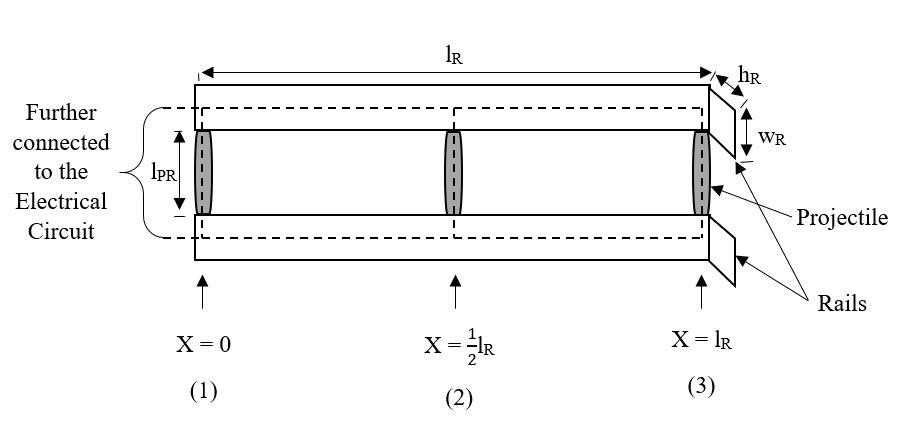



In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
class Electromagnetic_Propulsion :

       "class of all variables for EMP System"
       def __init__(self,dt,m,c,lor,lpr,tor,wr,roc,Vin):
         self.m= m       #Mass of the projectile
         self.g= 9.8              #Gravitational acceleration
         self.c= c         #capacitance
         self.Vin=Vin              #Input voltage
         self.lor=lor             #length of the rail
         self.lpr=lpr            #length of the projectile
         self.tor=tor           #thickness of the rail
         self.wr=wr              #width of the rail
         self.roc = roc          #resistance of the charging circuit
         self.u0= 4*(np.pi)*10e-7 #permeability of free space
         self.ur= 0.999994              #relative permeabilty of copper
         self.roh=0.74e-6           #Resistivity of the stainless steel (316)
                 # Kerriski Parameters for inductance gradient
         self.A=0.44061
         self.B=-0.0771
         self.a1=3.397143
         self.a2=-0.06603
         self.b1=1.007719
         self.b2=2.743651
         self.b3=0.022093
         self.b4=0.263739
         self.CoefFric= 0.6  #Coefficient of friction for clean copper
         self.dt= dt         #time




      #Area of Rail:
       def Ar(self):
         return self.wr*self.tor
      #resistance per unit length:
       def grad_R(self):
          return  (self.roh)/self.Ar()
      #resistance of rail:
       def Ror(self):
          return (2*self.roh*(self.lpr+2*self.dx())/self.Ar())
      #inductance of the rail:
       def grad_L(self):
          return ((self.A + self.B*math.log(self.a1*(self.wr/self.tor)+self.a2*(self.wr*self.lpr/(self.tor)**2)))*math.log(self.b1+self.b2*(self.lpr/self.tor)+self.b3*(self.lpr/self.tor)+self.b4*(self.lpr*self.wr/(self.tor)**2)))*1e-6
      #current input from the capacitor:
       def I_peak(self):
           return (self.Vin/self.roc)
       def I_in(self):
           return self.Vin/(self.roc+self.Ror()+self.grad_L()*2*self.vel())
       def I_c(self):
           return (self.Vin/self.roc)*np.exp((-1/(self.roc*self.c))*self.dt)
       def tau(self):
           return (self.roc*self.c)
       def I_tau(self):
           return self.I_peak()*0.371
      #force exerted due to the electric circuit:
       def Fe(self):
          return (0.5*self.grad_L()*(self.I_peak())**2)
       def acc(self):
          return self.Fe()/self.m
       def Fric(self):
          return self.CoefFric*self.m*self.g

Simulation for RC circuit

1. Charging Circuit

Tau(s) 9e-06


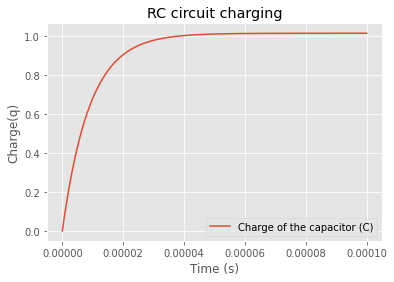

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

c = 2250e-6
v = 450
r_in = 0.004
t = np.linspace(0,0.0001,1000)
q = c*v*(1-np.exp((-1/(r_in*c))*t))
Tau_charge = r_in*c
plt.plot(t,q,label='Charge of the capacitor (C)')
print('Tau(s)',Tau_charge)

plt.xlabel('Time (s)')
plt.ylabel('Charge(q)')
plt.title('RC circuit charging')
plt.legend()
plt.show()

2. Discharge Circuit

Tau(s) 1.78e-05
Peak current(A) 112500.0
Energy stored(Joules) 450.5625
PointA: 1.78e-05 41737.5
0.5*i_peak: 56250.0


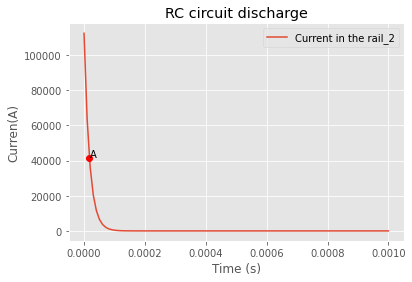

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

c = 4450e-6
v = 450
r_rail_1 = 0.004
r_rail_2 = 0.4


t = np.linspace(0,1e-3,100)
i_1 = (v/r_rail_1)*np.exp((-1/(r_rail_1*c))*t)
i_2 = (v/r_rail_2)*np.exp((-1/(r_rail_2*c))*t)
i_peak = v/r_rail_1
i_peak_1 = v/r_rail_2
Tau_discharge = r_rail_1*c
Tau_discharge2 = r_rail_2*c

plt.plot(t,i_1,label='Current in the rail_2')

plt.plot(Tau_discharge,i_peak*0.371,'ro')
plt.annotate("A",(Tau_discharge,i_peak*0.371))

print('Tau(s)',Tau_discharge)
print('Peak current(A)',i_peak)
print('Energy stored(Joules)',0.5*(c*(v**2)))

print('PointA:',Tau_discharge,i_peak*0.371)
print('0.5*i_peak:',i_peak*0.5)

plt.xlabel('Time (s)')
plt.ylabel('Curren(A)')
plt.title('RC circuit discharge')
plt.savefig('charge.png', dpi = 300 )
plt.legend()
plt.show()

Simulation of :
1. Current:I(t) in A
2. Force on the projectile : F(t) in N
3. Acceleration of the projectile : a(t) in m/s^2
4. Velocity of the projectile : v(t) in m/s
5. distance travelled by the projectile : x(t) in m




In [ ]:
Dt = np.linspace(0,0.004,100)
Mass = 0.125
capacitance = 2200e-6
length = 1
Lpr = 0.006
Wr = 0.012
Tor = 0.006
Roc = 0.004
vin = 450
n= 0.001
t_start = 0
t_end = 2
rn = t_end/n
solve = Electromagnetic_Propulsion(dt=Dt,m=Mass,c=capacitance,lor=length,lpr=Lpr,tor=Tor,wr=Wr,roc=Roc,Vin=vin)
grad_L= solve.grad_L()
grad_R = solve.grad_R()
I_p = solve.I_peak()
Fe_i = solve.Fe()
acc_i = solve.acc()
Ff = solve.Fric()

I = []
F = []
a = []
v = [0]
x = [0]


for i in range (2000):
  I.append(vin/(Roc + (grad_R*(Tor+2*x[i])) + (grad_L)*v[i]))
  F.append(0.5*(grad_L)*(I[i])**2-Ff)
  a.append(F[i]/(2*Mass))
  v.append(v[i]+(a[i]*n))
  x.append(v[i]*(n) + 0.5*a[i]*((n)**2))


del v[-1]
del x[-1]


time = np.arange(t_start,t_end,n)

df = pd.DataFrame({'Time' :time, 'I(A)': I, 'Force(N)': F, 'Accelaration(m/s**2)': a, 'Velocity(m/s)': v, 'Distance(m)': x})
df


,Time,I(A),Force(N),Accelaration(m/s**2),Velocity(m/s),Distance(m)
0,0.000,110791.957325,2635.113256,10540.453025,0.000000,0.000000
1,0.001,107796.671667,2494.518298,9978.073191,10.540453,0.005270
2,0.002,102512.792031,2255.893449,9023.573795,20.518526,0.015529
3,0.003,98063.440214,2064.256101,8257.024405,29.542100,0.025030
4,0.004,94339.257989,1910.388914,7641.555655,37.799124,0.033671
...,...,...,...,...,...,...
1995,1.995,16114.688350,55.028209,220.112835,1137.259959,1.137150
1996,1.996,16112.022807,55.009763,220.039051,1137.480072,1.137370
1997,1.997,16109.359039,54.991332,219.965327,1137.700111,1.137590
1998,1.998,16106.697044,54.972916,219.891665,1137.920076,1.137810


Plots :

1. I(t) vs time


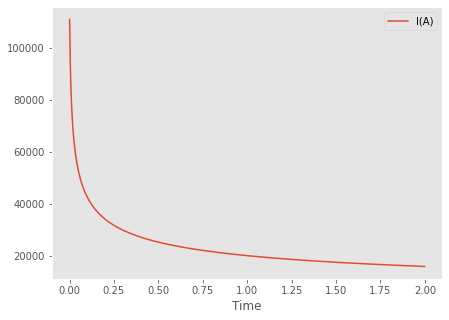

In [ ]:
df.plot(x='Time', y='I(A)', figsize=(7, 5))
plt.grid()
plt.show()


2. F(t) vs time

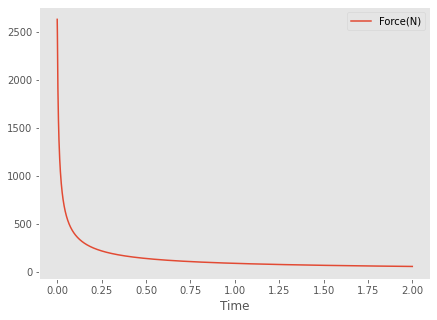

In [ ]:
df.plot(x='Time', y='Force(N)', figsize=(7, 5))
plt.grid()

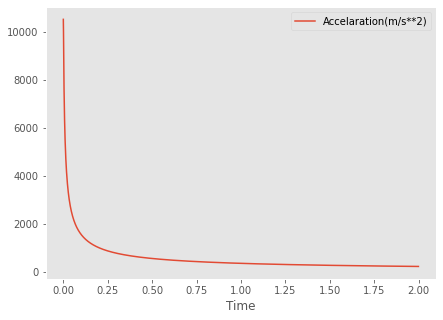

In [ ]:
df.plot(x='Time', y='Accelaration(m/s**2)', figsize=(7, 5))
plt.grid()


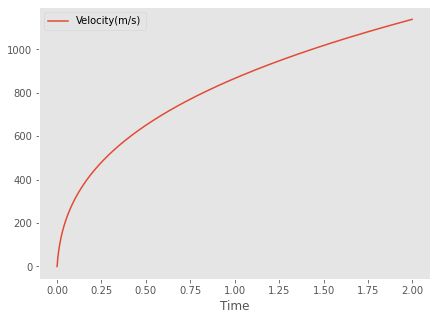

In [ ]:
df.plot(x='Time', y='Velocity(m/s)', figsize=(7, 5))
plt.grid()

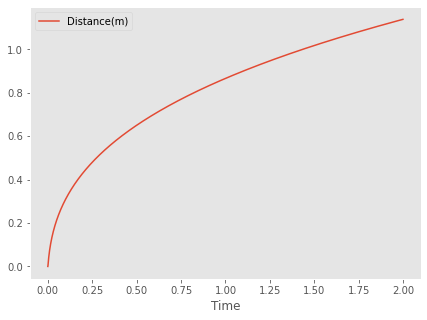

In [ ]:
df.plot(x='Time', y='Distance(m)', figsize=(7, 5))

plt.grid()

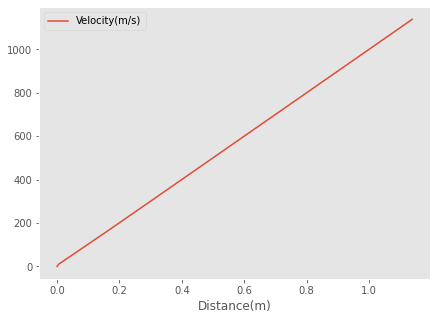

In [ ]:
df.plot(y='Velocity(m/s)', x='Distance(m)', figsize=(7, 5))

plt.grid()

Simulation of shooting projectile at an angle (theta) without air drag

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Drag coefficient, projectile radius (m), area (m2) and mass (kg).
c = 0.47
r = 0.05
A = Lpr*Wr
m = 0.125
# Air density (kg.m-3), acceleration due to gravity (m.s-2).
rho_air = 1.28
g = 9.81
# For convenience, define  this constant.
k = 0.5 * c * rho_air * A

# Initial speed and launch angle (from the horizontal).
v0 = 1000
phi0 = np.radians(65)

def deriv(t, u):
    x, xdot, z, zdot = u
    speed = np.hypot(xdot, zdot)
    xdotdot = -k/m * speed * xdot
    zdotdot = -k/m * speed * zdot - g
    return xdot, xdotdot, zdot, zdotdot

# Initial conditions: x0, v0_x, z0, v0_z.
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)
# Integrate up to tf unless we hit the target sooner.
t0, tf = 0, 50

def hit_target(t, u):
    # We've hit the target if the z-coordinate is 0.
    return u[2]
# Stop the integration when we hit the target.
hit_target.terminal = True
# We must be moving downwards (don't stop before we begin moving upwards!)
hit_target.direction = -1

def max_height(t, u):
    # The maximum height is obtained when the z-velocity is zero.
    return u[3]

soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                 events=(hit_target, max_height))
print(soln)
print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

# A fine grid of time points from 0 until impact time.
t = np.linspace(0, soln.t_events[0][0], 100)

# Retrieve the solution for the time grid and plot the trajectory.
sol = soln.sol(t)
x, z = sol[0], sol[2]
print('Range to target, xmax = {:.2f} m'.format(x[-1]))
print('Maximum height, zmax = {:.2f} m'.format(max(z)))
plt.plot(x, z)
plt.xlabel('x /m')
plt.ylabel('z /m')
plt.show()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fcb181a4550>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.41421111e-06, 1.55563222e-05, 1.56977433e-04,
       1.57118854e-03, 1.57132996e-02, 1.57134411e-01, 1.57134552e+00,
       4.46107155e+00, 8.82805793e+00, 1.55828677e+01, 2.64068717e+01,
       4.44193508e+01, 5.00000000e+01])
 t_events: [array([], dtype=float64), array([29.67686479])]
        y: array([[ 0.00000000e+00,  5.97671367e-04,  6.57437699e-03,
         6.63406277e-02,  6.63922607e-01,  6.63170448e+00,
         6.55203732e+01,  5.87643928e+02,  1.40150879e+03,
         2.28765434e+03,  3.27509849e+03,  4.44643155e+03,
         5.93269011e+03,  6.28931622e+03],
       [ 4.22618262e+02,  4.22618158e+02,  4.22617123e+02,
         4.22606768e+02,  4.22503246e+02,  4.21470888e+02,
         4.11425014e+02,  3.32725693e+0

IndexError: ignored

# New Section

# New Section